<h2>Small Image Classification Using CNN and Transfer Learning</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below.


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

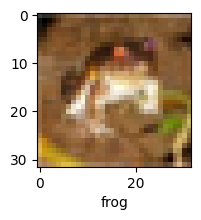

In [ ]:
plot_sample(X_train, y_train, 0)

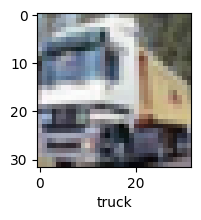

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the Training Data

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 4ms/step - loss: 1.8132 - accuracy: 0.3528
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6248 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5425 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4825 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4323 - accuracy: 0.4963


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.51      0.55      1000
           1       0.65      0.56      0.61      1000
           2       0.35      0.40      0.37      1000
           3       0.23      0.72      0.35      1000
           4       0.55      0.22      0.31      1000
           5       0.48      0.15      0.22      1000
           6       0.58      0.40      0.48      1000
           7       0.55      0.53      0.54      1000
           8       0.76      0.47      0.58      1000
           9       0.53      0.59      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.53      0.46      0.46     10000
weighted avg       0.53      0.46      0.46     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 4ms/step - loss: 1.4398 - accuracy: 0.4815
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0900 - accuracy: 0.6197
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9568 - accuracy: 0.6652
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8681 - accuracy: 0.6982
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7957 - accuracy: 0.7257
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7372 - accuracy: 0.7443
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6855 - accuracy: 0.7615
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6448 - accuracy: 0.7741
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5993 - accuracy: 0.7926
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.56

**With CNN, at the end 10 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives good accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9257 - accuracy: 0.7001


[0.9256538152694702, 0.7001000046730042]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.4327503e-04, 6.3347878e-05, 1.1643777e-03, 9.1108882e-01,
        1.8301513e-03, 7.0966236e-02, 9.2944116e-05, 2.9469920e-05,
        1.4317543e-02, 3.8252215e-06],
       [6.2373461e-04, 4.6050601e-02, 2.7338954e-06, 2.6653920e-08,
        4.6764633e-08, 9.6400878e-09, 2.0440636e-08, 2.4151861e-10,
        9.5312881e-01, 1.9396245e-04],
       [4.8915887e-01, 2.6283228e-01, 2.4538664e-02, 1.7812591e-02,
        4.7482983e-03, 3.3348429e-04, 1.5201025e-03, 2.2256779e-04,
        1.7972597e-01, 1.9107103e-02],
       [7.6812130e-01, 8.5626524e-03, 1.5743076e-03, 2.2871497e-03,
        1.4031670e-03, 5.0322571e-05, 4.9499015e-04, 4.9035902e-05,
        2.1720015e-01, 2.5692707e-04],
       [3.0937362e-09, 4.4700737e-08, 9.0370694e-04, 2.9585611e-03,
        7.3490864e-01, 8.5486126e-06, 2.6121998e-01, 3.1884221e-07,
        2.3361166e-09, 1.3980582e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

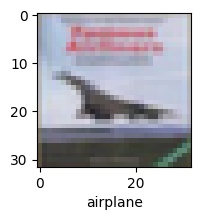

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

**ResNet50**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 503s 426ms/step - loss: 1.6400 - acc: 0.4631 - val_loss: 0.8222 - val_acc: 0.7667
Epoch 2/10
1125/1125 [==============================] - 482s 428ms/step - loss: 0.9631 - acc: 0.7197 - val_loss: 0.4171 - val_acc: 0.8953
Epoch 3/10
1125/1125 [==============================] - 477s 424ms/step - loss: 0.7167 - acc: 0.8133 - val_loss: 0.3444 - val_acc: 0.9195
Epoch 4/10
1125/1125 [==============================] - 476s 423ms/step - loss: 0.5456 - acc: 0.8719 - val_loss: 0.2669 - val_acc: 0.9335
Epoch 5/10
1125/1125 [==============================] - 476s 423ms/step - loss: 0.4263 - acc: 0.9108 - val_loss: 0.2324 - val_acc: 0.9383
Epoch 6/10
1125/1125 [==============================] - 482s 429ms/step - loss: 0.3387 - acc: 0.9365 - val_loss: 0.2353 - val_acc: 0.9385
Epoch 7/10
1125/1125 [==============================] - 477s 424ms/step - loss: 0.2800 - acc: 0.9500 - val_loss: 0.2237 - val_acc: 0.9413
Epoch 8/10
1125/1125 [============

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 40s 124ms/step - loss: 0.2318 - acc: 0.9386
Test Accuracy = 0.9386000037193298


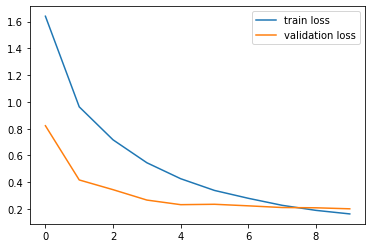

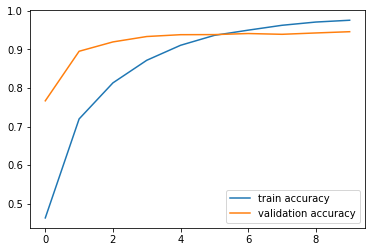

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()